In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("../data/clean_psyphysical_main1.csv")

In [5]:
#Create unique players
df["player_nb"] = df["player"]
df["player"] = df["player"].astype(str)
df["player"] = df["player"] + df["participant_code"]

#combine session code with mastok session
df['mk_session'] = df['mk_session'].replace('mk:Ultimatum_Game_Real:', 'mk_', regex=True)
df['mk_session'] = df['mk_session'] + "_" + df['session_code']
df= df.loc[df["participant_code"] != "upmsjgar"]

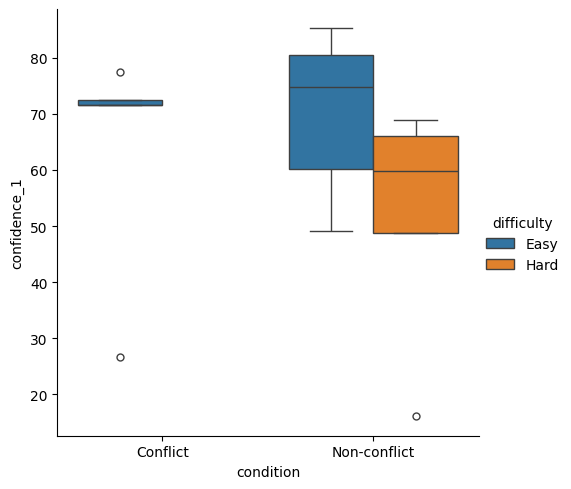

In [28]:
df_analysis = df.groupby(["condition","difficulty","player"])['confidence_1'].mean().reset_index()
sns.catplot(x = "condition", y = "confidence_1", hue = "difficulty", data = df_analysis, kind = "box")

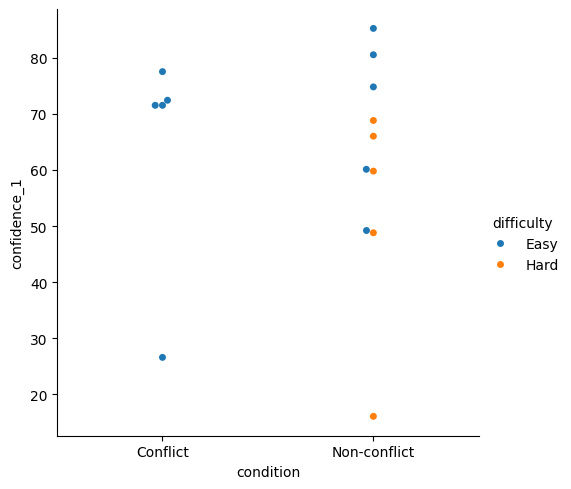

In [29]:
df_analysis = df.groupby(["condition","difficulty","player"])['confidence_1'].mean().reset_index()
sns.catplot(x = "condition", y = "confidence_1", hue = "difficulty", data = df_analysis, kind = "swarm")

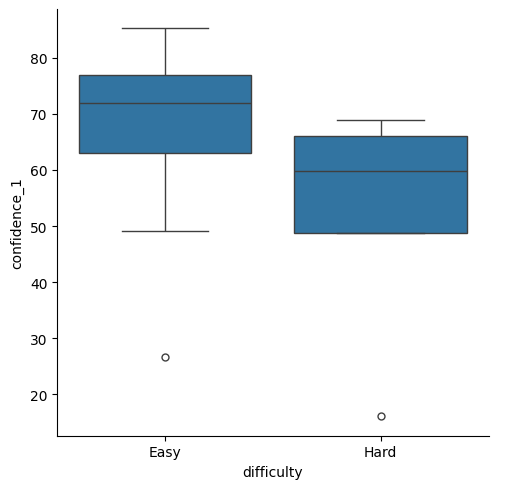

In [30]:
df_analysis = df.groupby(["condition","difficulty","player"])['confidence_1'].mean().reset_index()
sns.catplot(x = "difficulty", y = "confidence_1", data = df_analysis, kind = "box")

## CONFIDENCE 

<Axes: xlabel='conf_change', ylabel='Count'>

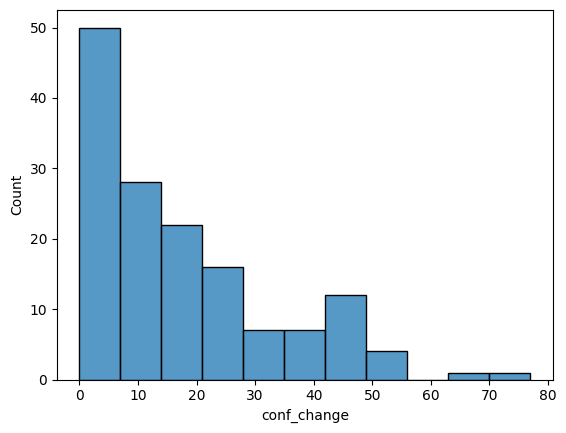

In [7]:
df["conf_change"] = abs(df["confidence_1"] - df["confidence_2"])
sns.histplot(x = "conf_change", data=df)

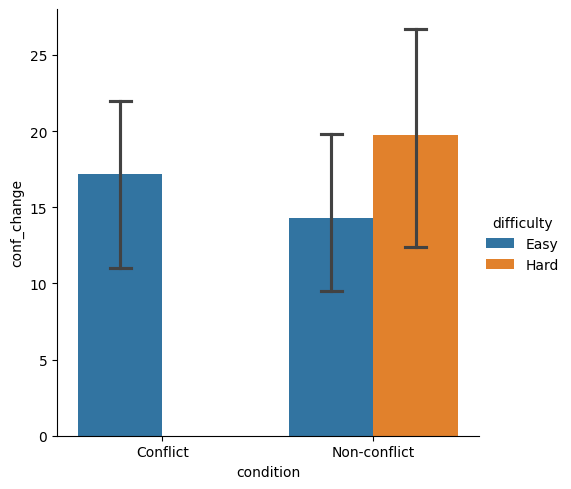

In [9]:
df_analysis = df.groupby(["condition","difficulty","player"])['conf_change'].mean().reset_index()
sns.catplot(x = "condition", y = "conf_change", hue = "difficulty", data = df_analysis, kind = "bar", capsize = .2)

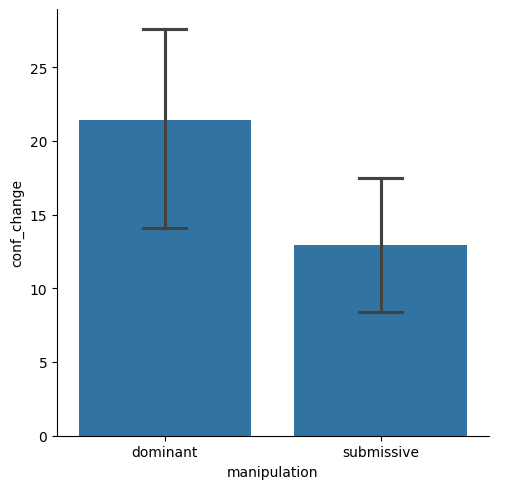

In [11]:
df_conflict = df.loc[df["condition"] == "Conflict"]

df_analysis= df_conflict.groupby(["manipulation","player"])['conf_change'].mean().reset_index()
sns.catplot(x = "manipulation", y = "conf_change", data = df_analysis, kind = "bar", capsize = .2)


In [20]:
df_responded = df[df['indv_response'].notna()]
df_responded["changed_answer"] = df_responded["indv_response"] != df_responded["group_choice"]
print(df_responded["changed_answer"].mean()) #7.2


0.21621621621621623


C:\Users\DanielZander\AppData\Local\Temp\ipykernel_10252\4265942707.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_responded["changed_answer"] = df_responded["indv_response"] != df_responded["group_choice"]


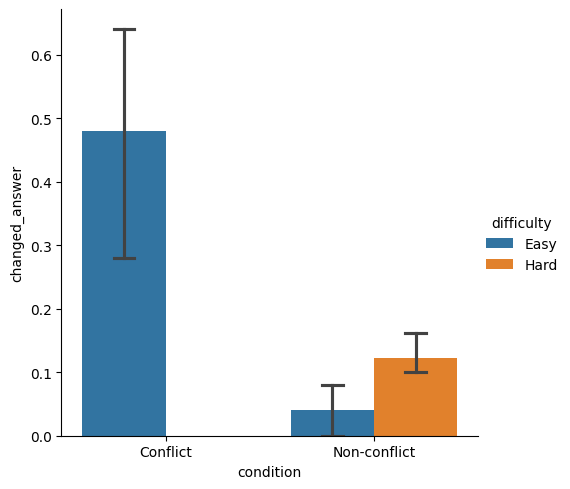

In [21]:

df_analysis= df_responded.groupby(["condition","difficulty", "player"])['changed_answer'].mean().reset_index()
sns.catplot(x = "condition", y = "changed_answer", hue = "difficulty", data = df_analysis, kind = "bar", capsize = .2)

TypeError: Could not convert string 'RightLeftRightRightLeftRightLeftRightRightLeftRightLeftRightLeftRightLeftRightRightRightRightLeftRightLeftRightRightLeftLeftRightRightLeftRightRightLeftRightRightLeftLeftLeftLeftRightRightRightLeftLeftLeftLeftRightLeftRightLeftRightLeftLeftLeftRightLeftLeftRightRightRightRightRightRightRightRightRightLeftLeftRightLeftRightRightRightRightLeftRightLeftRightRightLeftRightLeftLeftRightRightRightLeftLeftRightLeftLeftRightLeftRightLeftRightLeftRightRightLeftRightLeftRightRightLeftRightLeftRightLeftLeftLeftRightRightRightRightLeftLeftLeftLeftLeftLeftRightRightRightRightRightLeftLeftRightRightRightRightLeftRightLeftRightRightLeftLeftRightRightLeftLeftLeftRightRightLeftRightRightRight' to numeric

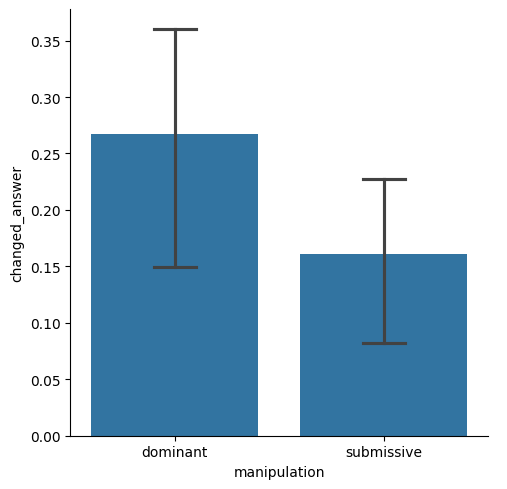

In [25]:
df_conflict = df_responded.loc[df["condition"] == "Conflict"]
df_analysis= df_responded.groupby(["manipulation", "player"])['changed_answer'].mean().reset_index()
sns.catplot(x = "manipulation", y = "changed_answer", data = df_analysis, kind = "bar", capsize = .2)


